# Библиотеки numpy, matplotlib и pandas

Данный notebook частично основан на конспекте лекции по курсу «Программирование на языке Python для сбора и анализа данных» (НИУ ВШЭ, 2015-16). Он распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0](http://creativecommons.org/licenses/by-sa/4.0/). При использовании обязательно упоминание автора курса и аффилиации. [Страница курса](http://math-info.hse.ru/s15/m). Фрагменты кода, включенные в этот notebook, публикуются как [общественное достояние](http://creativecommons.org/publicdomain/zero/1.0/).

In [1]:
%matplotlib inline

Эта директива используется для отображения графиков прямо в Jupyter. Рекомендуем всегда не задумываясь вставлять ее в свои ноутбуки.

## Краткое введение в Pandas

### Работа с таблицами

Проще всего сохранить таблицу в Python в списке, элементами которого являются списки — строки таблицы. Например, вот такая табличка:

<table>
<tr>
<td>1</td><td>2</td><td>3</td>
</tr>
<tr>
<td>4</td><td>5</td><td>6</td>
</tr>
</table>

будет записана вот в таком виде:

In [2]:
table = [[1, 2, 3], [4, 5, 6]]
table

[[1, 2, 3], [4, 5, 6]]

Например, можно получить третий элемент второй строки вот так:

In [3]:
table[1][2]

6

Или целиком первую строку:

In [4]:
table[0]

[1, 2, 3]

### Считывание данных: чистый Python

Попробуем что-нибудь поделать средствами чистого Python без дополнительных библиотек. Посмотрим на содержание файла с демонстрационными данными для многоклассовой классификации.

In [5]:
with open('data.csv') as data_file:
    print(data_file.read())

Feature1,Weight,Height,Bla-bla,Size,Class
10.0,12,344,0,23.0,Class1
7.2,12,208,0,18.0,Class2
19.0,11,344,1,21.0,Class4
7.2,13,208,0,20.0,Class2
9.2,20,208,0,17.0,Class1
19.0,11,254,2,11.0,Class3



Можно увидеть, что первая строчка является заголовком, а каждая следующая строчка — описанием объекта. Последний столбец является меткой класса. В машинном обучении его еще называют целевой меткой, потому что его в дальнейшем нужно будет предсказывать. Все остальные столбцы называются признаковым описанием объектов или просто признаками.

### Считывание данных: чистый Python

In [6]:
points = []
with open('data.csv', 'r') as data_file:
    next(data_file) # skip first line
    for line in data_file:
        columns = line.strip().split(',')
        features = [float(feature) for feature in columns[:5]]
        label = columns[5]
        points.append({'features': features, 'label': label})
        
points

[{'features': [10.0, 12.0, 344.0, 0.0, 23.0], 'label': 'Class1'},
 {'features': [7.2, 12.0, 208.0, 0.0, 18.0], 'label': 'Class2'},
 {'features': [19.0, 11.0, 344.0, 1.0, 21.0], 'label': 'Class4'},
 {'features': [7.2, 13.0, 208.0, 0.0, 20.0], 'label': 'Class2'},
 {'features': [9.2, 20.0, 208.0, 0.0, 17.0], 'label': 'Class1'},
 {'features': [19.0, 11.0, 254.0, 2.0, 11.0], 'label': 'Class3'}]

### Работа с данными: чистый Python

Теперь можно выполнить простейшую аналитику по набору данных. Давайте посчитаем количество объектов каждого класса.

In [7]:
from collections import defaultdict

counter = defaultdict(int)
for point in points:
    counter[point['label']] += 1
     
counter

defaultdict(int, {'Class1': 2, 'Class2': 2, 'Class4': 1, 'Class3': 1})

### Считывание данных: Pandas

Подключаем библиотеку pandas, предназначенную для считывания, предобработки, быстрой визуализации и простой аналитики по набору данных.

In [8]:
import pandas as pd

В pandas реализованы типы данных с разным числом измерений: одномерный тип (просто ряд) называется `Series`, двумерный (табличка) — `DataFrame`, трёхмерный — `Panel`. Считаем данные в `DataFrame`, который представляет из себя таблицу с проименованными строками и столбцами.

In [9]:
df = pd.read_csv('data.csv')
print(df)

   Feature1  Weight  Height  Bla-bla  Size   Class
0      10.0      12     344        0  23.0  Class1
1       7.2      12     208        0  18.0  Class2
2      19.0      11     344        1  21.0  Class4
3       7.2      13     208        0  20.0  Class2
4       9.2      20     208        0  17.0  Class1
5      19.0      11     254        2  11.0  Class3


### Pandas: индексация столбцов

У такой таблицы можно обращаться к строкам, а можно и к столбцам:

In [10]:
df.columns

Index(['Feature1', 'Weight', 'Height', 'Bla-bla', 'Size', 'Class'], dtype='object')

In [11]:
df['Size'] # первый столбец

0    23.0
1    18.0
2    21.0
3    20.0
4    17.0
5    11.0
Name: Size, dtype: float64

Можно создать новый столбец:

In [12]:
df['Feature2'] = [1, 2, 3, 4, 5, 6]
print(df)

   Feature1  Weight  Height  Bla-bla  Size   Class  Feature2
0      10.0      12     344        0  23.0  Class1         1
1       7.2      12     208        0  18.0  Class2         2
2      19.0      11     344        1  21.0  Class4         3
3       7.2      13     208        0  20.0  Class2         4
4       9.2      20     208        0  17.0  Class1         5
5      19.0      11     254        2  11.0  Class3         6


### Pandas: индексация столбцов

Ещё можно обратиться к столбцу по его имени вот так:

In [13]:
df.Size

0    23.0
1    18.0
2    21.0
3    20.0
4    17.0
5    11.0
Name: Size, dtype: float64

Создание нового столбца таким образом не сработает:

In [14]:
df.Feature3 = [2, 4, 8, 16, 32, 64]
print(df)

   Feature1  Weight  Height  Bla-bla  Size   Class  Feature2
0      10.0      12     344        0  23.0  Class1         1
1       7.2      12     208        0  18.0  Class2         2
2      19.0      11     344        1  21.0  Class4         3
3       7.2      13     208        0  20.0  Class2         4
4       9.2      20     208        0  17.0  Class1         5
5      19.0      11     254        2  11.0  Class3         6


/Users/alekseyzubakov/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


### Pandas: выборка нескольких столбцов

Если передать список из нескольких элементов, то вернётся датафрейм с соответствующими столбцами:

In [15]:
print(df[['Weight', 'Height']])

   Weight  Height
0      12     344
1      12     208
2      11     344
3      13     208
4      20     208
5      11     254


### Pandas: индексация строк

In [16]:
df.index

RangeIndex(start=0, stop=6, step=1)

In [17]:
df.loc[1] # вторая строка

Feature1       7.2
Weight          12
Height         208
Bla-bla          0
Size            18
Class       Class2
Feature2         2
Name: 1, dtype: object

In [18]:
df.index = ['A', 'B', 'C', 'D', 'E', 'F']
print(df.loc['B'])

Feature1       7.2
Weight          12
Height         208
Bla-bla          0
Size            18
Class       Class2
Feature2         2
Name: B, dtype: object


### Pandas: слайсы

Несмотря на то, что просто квадратные скобки (безо всяких `.loc` перед ними) позволяют обращаться к столбцам таблицы, те же самые квадратные скобки, используемые вместе со срезами, работают «по строчкам». Например, вот так можно получить вторую и третью строчки таблицы:

In [19]:
print(df[1:3])

   Feature1  Weight  Height  Bla-bla  Size   Class  Feature2
B       7.2      12     208        0  18.0  Class2         2
C      19.0      11     344        1  21.0  Class4         3


Срезы можно делать не только по номерам строк, но и по их именам:

In [20]:
print(df['B':'D'])

   Feature1  Weight  Height  Bla-bla  Size   Class  Feature2
B       7.2      12     208        0  18.0  Class2         2
C      19.0      11     344        1  21.0  Class4         3
D       7.2      13     208        0  20.0  Class2         4


Важная разница состоит в том, что теперь срез *включает* последний элемент (в отличие от всего, что вы знали раньше о срезах). Срезы с номерами строк ведут себя как обычно (последний элемент не включается):

### Pandas: ещё о способах индексации

Если передать в `loc` два имени (через запятую), то вернется ячейка с соответствующей строкой и столбцом:

In [21]:
df.loc['A', 'Size']

23.0

А вот так можно с помощью `loc[]` получить столбец:

In [22]:
df.loc[:, 'Size']

A    23.0
B    18.0
C    21.0
D    20.0
E    17.0
F    11.0
Name: Size, dtype: float64

Здесь в качестве первого аргумента передаётся «тривиальный срез», то есть такой срез, у которого начало совпадает с началом всего массива, а конец с концом всего.

### Pandas: `iloc[]`

Метод `loc[]` работает с именами строк и столбцов, а если вы хотите использовать их номера, то вам нужен метод `iloc[]`. Работает он примерно так:

In [23]:
df.iloc[1] # вторая строка

Feature1       7.2
Weight          12
Height         208
Bla-bla          0
Size            18
Class       Class2
Feature2         2
Name: B, dtype: object

In [24]:
df.iloc[:, 2] # третий столбец

A    344
B    208
C    344
D    208
E    208
F    254
Name: Height, dtype: int64

In [25]:
df.iloc[1, 2] # ячейка во второй строке, третьем столбце

208

###  Pandas: `at[]` и `iat[]`

Обычные квадратные скобки, а также методы `loc[]` и `iloc[]` должны обрабатывать разные случаи, связанные со срезами и т.д. Это делает их медленными. Если вы хотите обратиться к конкретной ячейке, можете использовать для этого методы `at[]` или `iat[]`.

In [26]:
df.at['A', 'Size']

23.0

In [27]:
df.iat[0, 4]

23.0

### Pandas: операции со строками и столбцами

Допустим, мы хотим посчитать среднее значение каждой фичи.

Для начала создадим копию таблицы без столбеца `Class`:

In [28]:
df2 = df.copy()
del df2['Class']
print(df2)

   Feature1  Weight  Height  Bla-bla  Size  Feature2
A      10.0      12     344        0  23.0         1
B       7.2      12     208        0  18.0         2
C      19.0      11     344        1  21.0         3
D       7.2      13     208        0  20.0         4
E       9.2      20     208        0  17.0         5
F      19.0      11     254        2  11.0         6


In [29]:
df2.mean()

Feature1     11.933333
Weight       13.166667
Height      261.000000
Bla-bla       0.500000
Size         18.333333
Feature2      3.500000
dtype: float64

### Pandas: операции со строками и столбцами

А может быть нас интересует средняя значение по каждой строке? Можно предложить два способа его посчитать. Во-первых, можно транспонировать нашу табличку, записав строки по столбцам, и применить к ней тот же метод `mean()`.

In [30]:
print(df2.T)

              A      B      C      D      E      F
Feature1   10.0    7.2   19.0    7.2    9.2   19.0
Weight     12.0   12.0   11.0   13.0   20.0   11.0
Height    344.0  208.0  344.0  208.0  208.0  254.0
Bla-bla     0.0    0.0    1.0    0.0    0.0    2.0
Size       23.0   18.0   21.0   20.0   17.0   11.0
Feature2    1.0    2.0    3.0    4.0    5.0    6.0


In [31]:
df2.T.mean()

A    65.000000
B    41.200000
C    66.500000
D    42.033333
E    43.200000
F    50.500000
dtype: float64

### Pandas: операции со строками и столбцами

Во-вторых (и это, наверное, проще), можно передать методу `mean()` параметр `axis`, указывающий, вдоль какой оси нужно считать. (Такое свойство есть у разных функций, работающих со строками или столбцами.)

In [32]:
df2.mean(axis=1)

A    65.000000
B    41.200000
C    66.500000
D    42.033333
E    43.200000
F    50.500000
dtype: float64

In [33]:
df.mean(axis='columns') # можно ещё так

A    65.000000
B    41.200000
C    66.500000
D    42.033333
E    43.200000
F    50.500000
dtype: float64

### Pandas: операции со строками и столбцами

Конечно, есть не только среднее, но и другие распространённые функции дескриптивной статистики.

In [34]:
df2.min()

Feature1      7.2
Weight       11.0
Height      208.0
Bla-bla       0.0
Size         11.0
Feature2      1.0
dtype: float64

In [35]:
df2.max()

Feature1     19.0
Weight       20.0
Height      344.0
Bla-bla       2.0
Size         23.0
Feature2      6.0
dtype: float64

In [36]:
df2.median()

Feature1      9.6
Weight       12.0
Height      231.0
Bla-bla       0.0
Size         19.0
Feature2      3.5
dtype: float64

### Pandas: работа с данными

Возьмем столбец с меткой класса и посчитаем количество элементов каждого значения в нем с помощью стандартной функции.

In [37]:
df['Class'].value_counts()

Class1    2
Class2    2
Class4    1
Class3    1
Name: Class, dtype: int64

Кроме того, это можно быстро визуализировать.

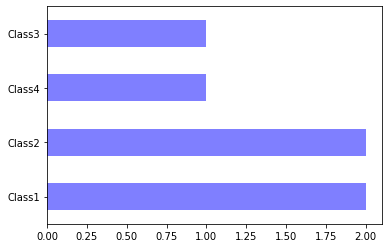

In [38]:
df['Class'].value_counts().plot(kind='barh', color="blue", alpha=.5)

### Pandas: `join`

`DataFrame` поддерживает возможность работы в стиле БД. Например, есть операции `groupby` и `join`.

О разных видах `join`, а также об операциях `merge` и `concatenate` можно прочесть тут: http://pandas.pydata.org/pandas-docs/stable/merging.html

Сгруппируем наши данные по полю Bla-bla и посчитаем максимальный Size в каждой группе:

In [39]:
df.groupby('Bla-bla')['Size'].max()

Bla-bla
0    23.0
1    21.0
2    11.0
Name: Size, dtype: float64

### Pandas: `join`

Простой join двух табличек по индексам индексам:

In [40]:
df_2 = df.copy()
df_2.columns = [f'{name}_' for name in df.columns]
df.join(df_2, )

,Feature1,Weight,Height,Bla-bla,Size,Class,Feature2,Feature1_,Weight_,Height_,Bla-bla_,Size_,Class_,Feature2_
A,10.0,12,344,0,23.0,Class1,1,10.0,12,344,0,23.0,Class1,1
B,7.2,12,208,0,18.0,Class2,2,7.2,12,208,0,18.0,Class2,2
C,19.0,11,344,1,21.0,Class4,3,19.0,11,344,1,21.0,Class4,3
D,7.2,13,208,0,20.0,Class2,4,7.2,13,208,0,20.0,Class2,4
E,9.2,20,208,0,17.0,Class1,5,9.2,20,208,0,17.0,Class1,5
F,19.0,11,254,2,11.0,Class3,6,19.0,11,254,2,11.0,Class3,6


Join можно делать самыми разными способами, например, можно делать inner или outer join:

In [41]:
df[0:4].join(df_2[2:], how='inner')

,Feature1,Weight,Height,Bla-bla,Size,Class,Feature2,Feature1_,Weight_,Height_,Bla-bla_,Size_,Class_,Feature2_
C,19.0,11,344,1,21.0,Class4,3,19.0,11,344,1,21.0,Class4,3
D,7.2,13,208,0,20.0,Class2,4,7.2,13,208,0,20.0,Class2,4


## Краткое введение в NumPy

С помощью Pandas можно удобно считывать, предобрабрабатывать и визуализировать данные, но основной инструмент, который понадобится в будущем — это NumPy.

In [42]:
import numpy as np

Основной тип данных в numpy — это [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html).

In [43]:
data = df.values
data

array([[10.0, 12, 344, 0, 23.0, 'Class1', 1],
       [7.2, 12, 208, 0, 18.0, 'Class2', 2],
       [19.0, 11, 344, 1, 21.0, 'Class4', 3],
       [7.2, 13, 208, 0, 20.0, 'Class2', 4],
       [9.2, 20, 208, 0, 17.0, 'Class1', 5],
       [19.0, 11, 254, 2, 11.0, 'Class3', 6]], dtype=object)

Если сразу же хочется работать с вещественными числами, то можно позвать `df.values.astype(np.float32)`, предварительно удалив/преобразовав данные, которые не приводятся к типу float32 (в данном случае):

In [44]:
data = df.drop('Class', axis=1).values.astype(np.float32)
data

array([[ 10. ,  12. , 344. ,   0. ,  23. ,   1. ],
       [  7.2,  12. , 208. ,   0. ,  18. ,   2. ],
       [ 19. ,  11. , 344. ,   1. ,  21. ,   3. ],
       [  7.2,  13. , 208. ,   0. ,  20. ,   4. ],
       [  9.2,  20. , 208. ,   0. ,  17. ,   5. ],
       [ 19. ,  11. , 254. ,   2. ,  11. ,   6. ]], dtype=float32)

Чтобы просто создать `np.array`, необходимо первым параметром передать последовательность. При создании можно явно указать тип хранимых значений (параметр `dtype`).

In [45]:
a = np.array([1, 2, 3, 4, 5, 6]) 
b = np.array([1, 2, 3, 4, 5, 6], dtype=np.float64)
a, b

(array([1, 2, 3, 4, 5, 6]), array([1., 2., 3., 4., 5., 6.]))

### Массивы похожи на списки (?)

In [46]:
q = np.array([4, 5, 8, 9])

Я дальше буду называть `np.array` массивами (в отличие от списком, которые мы так в Python не называем). Итак, можно обращаться к элементам массива по индексам, как и к спискам.

In [47]:
q[0]

4

И менять их тоже можно

In [48]:
q[0] = 12
q

array([12,  5,  8,  9])

In [49]:
len(q)

4

Можно итерировать элементы списка, хотя этого следует по возможности избегать — массивы numpy нужны как раз для того, чтобы не использовать циклы для выполнения массовых операций. Далее будет понятно, как это можно делать.

In [50]:
for x in q:
    print(x)

12
5
8
9


Можно брать слайсы (но с ними тоже есть хитрости, об этом далее).

In [51]:
q[1:3]

array([5, 8])

Давайте заведём ещё один массив.

In [52]:
w = np.array([2, 3, 6, 10])

Все арифметические операции над массивами выполняются поэлементно. Поэтому + означает сложение, а не конкатенацию. В отличие от обычных списков.

In [53]:
q + w

array([14,  8, 14, 19])

Если вы хотели сделать конкатенацию, то нужно использовать не оператор сложения, а специальную функцию.

In [54]:
np.concatenate([q, w])

array([12,  5,  8,  9,  2,  3,  6, 10])

Некоторые полезные функции для работы с массивами:

* arange — аналог range из питона, которому можно передать нецелочисленный шаг

In [55]:
np.arange(0, 10, 0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

* linspace — способ равномерно разбить отрезок на n-1 интервал

In [56]:
np.linspace(0, 10, 13)

array([ 0.        ,  0.83333333,  1.66666667,  2.5       ,  3.33333333,
        4.16666667,  5.        ,  5.83333333,  6.66666667,  7.5       ,
        8.33333333,  9.16666667, 10.        ])

* logspace — способ разбить отрезок по логарифмической шкале

In [57]:
np.logspace(0, 9, 10, base=2)

array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256., 512.])

Для создания массивов специального вида (состоящих уз нулей, единиц, пустых) есть отдельные функции:

* zeros
* ones
* empty

In [58]:
np.zeros((2, 2))

array([[0., 0.],
       [0., 0.]])

In [59]:
np.ones((2, 2))

array([[1., 1.],
       [1., 1.]])

In [60]:
np.empty((2, 2))

array([[1., 1.],
       [1., 1.]])

Все арифметические операции над массивами производятся поэлементно:

In [61]:
A = np.arange(0, 9).reshape(3, 3)
B = np.arange(1, 10).reshape(3, 3)

In [62]:
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [63]:
B

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [64]:
A + B

array([[ 1,  3,  5],
       [ 7,  9, 11],
       [13, 15, 17]])

In [65]:
A - 1

array([[-1,  0,  1],
       [ 2,  3,  4],
       [ 5,  6,  7]])

Обратите внимание, что умножение тоже поэлементное:

In [66]:
A * B

array([[ 0,  2,  6],
       [12, 20, 30],
       [42, 56, 72]])

Если хотим умножить их как матрицы, можно писать так:

In [67]:
np.dot(A, B)

array([[ 18,  21,  24],
       [ 54,  66,  78],
       [ 90, 111, 132]])

Обычно numpy функции принимают на вход numpy.array, поэтому все привычные операции можно выполнять над массивами:

In [68]:
np.min(A), np.max(A), np.sum(A)

(0, 8, 36)

In [69]:
np.sqrt(A)

array([[0.        , 1.        , 1.41421356],
       [1.73205081, 2.        , 2.23606798],
       [2.44948974, 2.64575131, 2.82842712]])

Эти же операции можно применять для заданной размерности массива (параметр axis):

In [70]:
np.min(A, axis=0), np.min(A, axis=1)

(array([0, 1, 2]), array([0, 3, 6]))

### Типы элементов в массивах

Вообще, в массивах могут храниться не только числа.

In [71]:
mixed_array = np.array([1, 2, 3, "Hello"])

Однако, все элементы, лежащие в одном массиве, должны быть одного типа.

In [72]:
mixed_array

array(['1', '2', '3', 'Hello'], dtype='<U21')

Здесь видно, что числа `1`, `2`, `3` превратились в строчки `'1'`, `'2'`, `'3'`. Параметр `dtype` содержит информацию о типе объектов, хранящихся в массиве. `<U21` означает юникодную строку длиной максимум 21 байт. При попытке записать более длинную строку она будет обрезана.

In [73]:
mixed_array[0] = 'Hello, World, This is a Test'
mixed_array[0]

'Hello, World, This is'

Вообще `numpy` при создании массива старается не терять информацию и выбирает самый «вместительный» тип.

In [74]:
np.array([1, 2, 3])

array([1, 2, 3])

In [75]:
np.array([1, 2, 3, 5.])

array([1., 2., 3., 5.])

Все числа превратились в вещественные, поскольку в исходном списке, из которого делается массив, есть вещественное число.

### Слайсы

Давайте посмотрим внимательно на срезы.

In [76]:
x = np.array([1.1, 2.2, 3.3, 4.4, 5.5])
s = x[1:3]
s

array([2.2, 3.3])

Пока всё идёт как обычно: мы создали срез, начинающийся с элемента с индексом 1 (то есть второй элемент, нумерация с нуля) и заканчивающийся элементом с индексом 3 (последний элемент всегда не включается).

Теперь попробуем изменить значение элемента *в слайсе*:

In [77]:
s[0] = 100
s

array([100. ,   3.3])

Как вы думаете, что произойдёт с исходным массивом `x`?

In [78]:
x

array([  1.1, 100. ,   3.3,   4.4,   5.5])

Оказывается, в numpy создание среза ничего не копирует: срез — это не новый массив, содержащий те же элементы, что старый, а так называемый *view* (вид), то есть своего рода интерфейс к старому массиву.

Если вам всё-таки нужно сделать копию массива, нужно использовать метод `copy()`.

### Продвинутая индексация

In [79]:
x

array([  1.1, 100. ,   3.3,   4.4,   5.5])

Можно выбрать из массива элементы с нужными номерами вот так:

In [80]:
y = x[[1, 3, 4]]
y

array([100. ,   4.4,   5.5])

Можно даже использовать одинаковые номера.

In [81]:
y = x[[1, 1, 1]]
y

array([100., 100., 100.])

Кстати, создаваемый таким образом объект уже является честной копией исходного, а не каким-нибудь коварным видом.

### Логическая индексация

In [82]:
a = np.arange(10)
good = np.array([True, False, False, True, True, True, False, False, True, False])
a[good]

array([0, 3, 4, 5, 8])

Почему это может понадобиться: как описано выше, к `np.array` можно применять операции, которые будут выполнены поэлементно, в том числе и логические:

In [83]:
a % 2 == 0

array([ True, False,  True, False,  True, False,  True, False,  True,
       False])

Поэтому чтобы найти все четные элементы данного массива, можно просто выполнить строчку:

In [84]:
a[a % 2 == 0]

array([0, 2, 4, 6, 8])

Можно использовать несколько условий. Скобочки очень важны, иначе ничего не заработает. Операция `&` соответствует логическому И и опять же выполняется поэлементно.

In [85]:
a[(a > 4) & (a % 2 == 0)]

array([6, 8])

Для некоторых случаев есть уже готовые функции:

In [86]:
a[a.nonzero()]

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Кстати, чтобы узнать, правда ли, что два массива равны (в том числе, что состоят из одних и тех же элементов, находящихся в одном и том же порядке), теперь нельзя использовать `==` — ведь это тоже поэлементная операция!

In [87]:
np.array([1, 2, 3]) == np.array([1, 2, 3])

array([ True,  True,  True])

Чтобы понять, правда ли, что массивы равны, можно использовать такой синтаксис:

In [88]:
(np.array([1, 2, 3]) == np.array([1,2,3])).all()

True

Здесь мы сначала сравниваем массивы поэлементно, а потом применяем к результату метод `all()`, возвращающий истину только если все элементы являются истиными. Этот подход часто используется, хотя имеет свои подводные камни (см. [на stackoverflow](http://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise)). Есть и специализированная функция для проверки на равенство:

In [89]:
np.array_equal(np.array([1, 2, 3]), np.array([1, 2, 3]))

True

### Конкатенация массивов

Одно из полезных знаний — конкатенация многомерных массивов:

In [90]:
a = np.arange(0, 10).reshape((2, 5))
b = np.arange(20, 30).reshape((5, 2))

Существуют два типа конкатенации: горизонтальная

In [91]:
np.hstack((a, b.T))

array([[ 0,  1,  2,  3,  4, 20, 22, 24, 26, 28],
       [ 5,  6,  7,  8,  9, 21, 23, 25, 27, 29]])

и вертикальная

In [92]:
np.vstack((a.T, b))

array([[ 0,  5],
       [ 1,  6],
       [ 2,  7],
       [ 3,  8],
       [ 4,  9],
       [20, 21],
       [22, 23],
       [24, 25],
       [26, 27],
       [28, 29]])

### Немного про Matplotlib

В Python существует много способов строить графики. Мы сейчас рассмотрим самый простой из них, а позже поговорим про более сложные. Для этого нам потребуется библиотека `matplotlib`, а точнее её часть под названием `pyplot`. Стандартный способ её импорта выглядит вот так:

Чтобы графики рисовались прямо в ноутбуке, нужно дать вот такую магическую команду:

In [99]:
import matplotlib.pyplot as plt

Простейшее рисование — это функция `plot`, она принимает на вход список $x$-координат, список $y$-координат и рисует соответствующую картинку либо в виде ломаной:

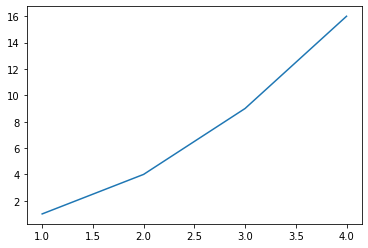

In [100]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

Либо в виде отдельный точек:

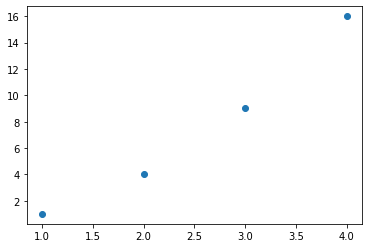

In [101]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'o')

Либо ещё кучей способов.

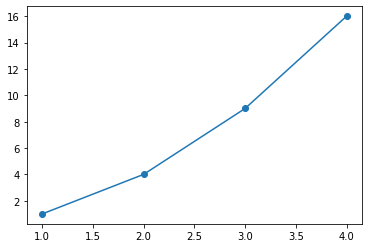

In [102]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], '-o')

Посмотрим, как `numpy` работает в связке с `matplotlib.pyplot`.

In [103]:
x_arr = np.linspace(-10, 10, 2001)
x_arr

array([-10.  ,  -9.99,  -9.98, ...,   9.98,   9.99,  10.  ])

In [104]:
len(x_arr)

2001

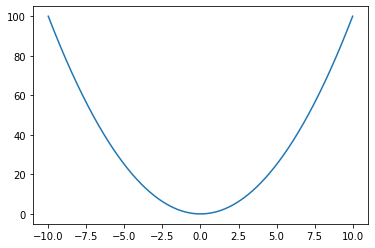

In [105]:
plt.plot(x_arr, x_arr ** 2)

Действительно, `x**2` — это массив, элементами которого являются квадраты чисел, лежащих в `x`. Значит, построив график, состоящий из точек, $x$-координаты которых записаны в `x`, а $y$-координаты с `x**2`, мы построим график функции $y=x^2$.

А вот, например, синусоида:

Text(0, 0.5, 'y')

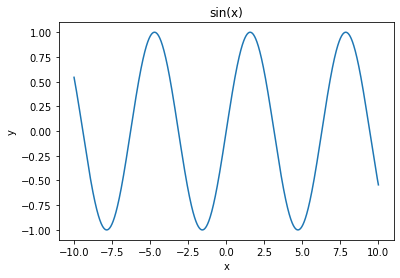

In [106]:
plt.plot(x_arr, np.sin(x_arr))
plt.title('sin(x)')
plt.xlabel('x')
plt.ylabel('y')

А вот что-то посложнее:

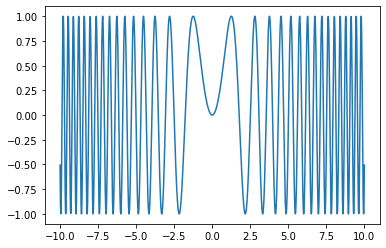

In [107]:
plt.plot(x_arr, np.sin(x_arr ** 2))

Добавим график косинуса. Чтобы различать графики, с помощью функции plt.legend добавим названия графиков.

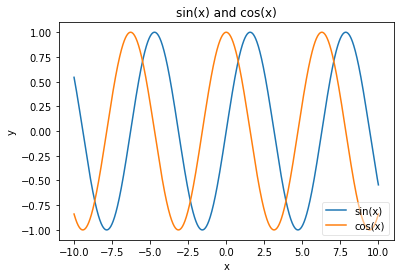

In [108]:
plt.plot(x_arr, np.sin(x_arr), label = 'sin(x)')
plt.plot(x_arr, np.cos(x_arr), label = 'cos(x)')

plt.title('sin(x) and cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right', framealpha=0.5)

Как можно было заметить, у функции `plt.legend` есть параметр `loc`, который отвечает за расположение легенды.

Графики, которые мы получили, не очень похожи на привычные нам. Дело в том, что оси координат имеют разный масштаб.

Во-первых, исправим это с помощью вызова функции `plt.axis('equal')`.

Во-вторых, изменим размер графика.

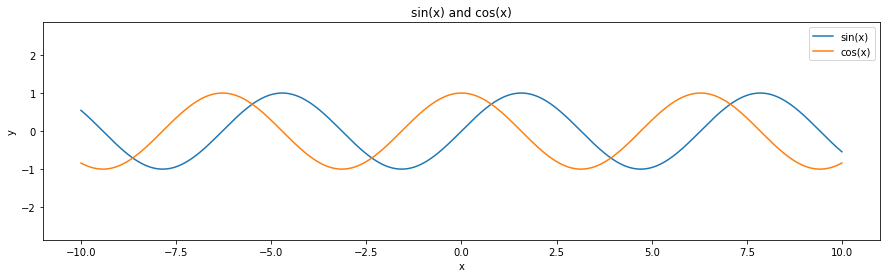

In [109]:
plt.figure(figsize=(15, 4))

plt.plot(x_arr, np.sin(x_arr))
plt.plot(x_arr, np.cos(x_arr))

plt.title('sin(x) and cos(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.axis('equal')
plt.legend(['sin(x)', 'cos(x)'])

Если нам нужно изменить шкалу осей, можно использовать функции xticks(), yticks()

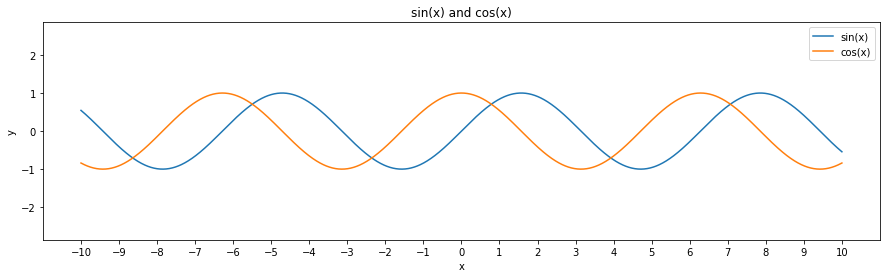

In [110]:
plt.figure(figsize=(15, 4))

plt.plot(x_arr, np.sin(x_arr))
plt.plot(x_arr, np.cos(x_arr))

plt.xticks(np.arange(-10, 11, 1))

plt.title('sin(x) and cos(x)')
plt.xlabel('x')
plt.ylabel('y')

plt.axis('equal')
plt.legend(['sin(x)', 'cos(x)'])

Конечно, мы могли бы получить данные не в результате вычисления значений какой-то функции, а откуда-то извне. Возьмём для примера случайные числа.

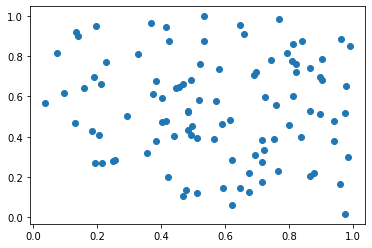

In [111]:
x_arr = np.random.random(100)
y_arr = np.random.random(100)
plt.plot(x_arr, y_arr, 'o')

Есть и специализированная функция для создания *scatter plot*.

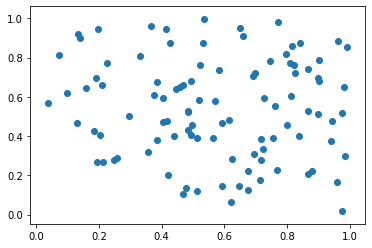

In [112]:
plt.scatter(x_arr, y_arr)

Ещё можно построить [гистограмму](https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0#.D0.92_.D1.81.D1.82.D0.B0.D1.82.D0.B8.D1.81.D1.82.D0.B8.D0.BA.D0.B5).

(array([ 4., 11.,  3., 10., 16.,  9., 11., 11., 12., 13.]),
 array([0.03839977, 0.13354524, 0.22869071, 0.32383618, 0.41898166,
        0.51412713, 0.6092726 , 0.70441807, 0.79956354, 0.89470901,
        0.98985448]),
 <a list of 10 Patch objects>)

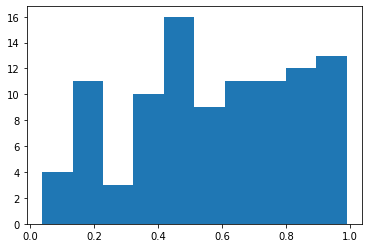

In [113]:
plt.hist(x_arr)

Можно строить трёхмерные картинки, но тут уже нужна магия и я не буду вдаваться в детали.

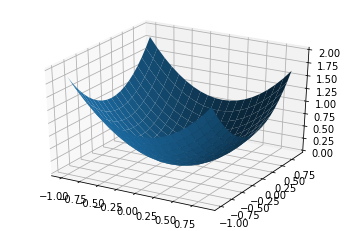

In [114]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
x, y = np.mgrid[-1:1:0.1, -1:1:0.1]
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, x ** 2 + y ** 2)

Наконец, можно строить интерактивные картинки!

In [115]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [116]:
def plot_pic(a, b):
    x = np.linspace(-3, 3, 200)
    plt.plot(x, np.sin(x * a + b))

In [117]:
interact(plot_pic, a=(0, 3, 0.1), b=[0, 3, 0.1])

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0), Dropdown(description='b', options=(0, …

<function __main__.plot_pic(a, b)>

Функция `interact` создаёт несколько бегунков и позволяет с их помощью задавать параметры у функции (в данном случае `plot_pic`), которая строит график.


Ещё `interact` можно вызывать так:

In [118]:
@interact(a=(0, 3, 0.1), b=[0, 3, 0.1])
def plot_pic(a, b):
    x = np.linspace(-3, 3, 200)
    plt.plot(x, np.sin(x * a + b))

interactive(children=(FloatSlider(value=1.0, description='a', max=3.0), Dropdown(description='b', options=(0, …